#  **Segmenting Agricultural Lands**




# 📋 **Business Objective Understanding**

## 🎯 **1 .Objective:**
To segment agricultural lands in Tunisia for agricultural businesses, enabling better decision-making for investment, development, and utilization of these lands.

---

### ❓ **Key Questions to Address:**
- 📌 **What are the key factors influencing land prices?**  
- 📌 **How can we categorize lands based on their features (e.g., proximity to the sea, infrastructure, type of agriculture)?**  
- 📌 **What are the trends in land prices over time and across regions?**  
- 📌 **How can we identify the most profitable or suitable lands for specific agricultural businesses?**  

---

# 📊 **2. Data Acquisition**

## 🗂 **2.1. Data Source**
- **Source:** Tunisie Annonce  
- **Data Type:** Scraped data containing agricultural land listings.  
- **Fields:** Gouvernorat, Délégation, Localité, Texte annonce, Prix, Date.  

---


## 🛠 **2.2. Data Collection Process**
- **Web Scraping:** Use tools like Python's `BeautifulSoup` or `Scrapy` to scrape the website.  
- **Target:** Extract all agricultural land listings.  
- **Fields to Scrape:**  
  - Gouvernorat  
  - Délégation  
  - Localité  
  - Texte annonce  
  - Prix  
  - Date  
- **Data Storage:** Store the scraped data in a structured format (e.g., CSV, SQL database).  
- **Data Cleaning:** Handle missing values, duplicates, and inconsistencies.  

---

**Install Required Libraries**

In [3]:
!pip install pandas matplotlib seaborn folium plotly scikit-learn
!pip install geopy

**Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import files
import re
from sklearn.metrics import silhouette_score
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


## 📝 **2.3. Data Sample**



In [20]:
# Load the data into a DataFrame
df = pd.read_csv('Land_Prices_9annas.csv')

# Display the first few rows
df.head()

,Gouvernorat,Délégation,Localité,Texte annonce,Prix,Date
0,Nabeul,Kélibia,Kélibia,Un terrain de 2350 mètre carré au cap bon prof...,1410000,02/04/2025
1,Nabeul,Kélibia,Kélibia,Offre de 913 mètre carré au cap bon un terrain...,730400,02/04/2025
2,Kairouan,Kairouan Ville,Kairouan Ville,"A Vendre Terrain Agricole A vendre , Terrain a...",360000,02/04/2025
3,Nabeul,Hammamet,Hammamet,Investissement sur je vous offre un terrain ag...,160000,02/04/2025
4,Manouba,Borj El Amri,Borj El Amri,Terrain agricole de 5000 m² à Borj El Amri À V...,200000,02/04/2025


# 📊 **3. Data Understanding**

---

## 🔍 **3.1. Data Exploration**
- **Gouvernorat:** The region where the land is located.  
- **Délégation:** Sub-region or district.  
- **Localité:** Specific locality or village.  
- **Texte annonce:** Description of the land, including features like size, proximity to amenities, and type of agriculture.  
- **Prix:** Price of the land.  
- **Date:** Date of the listing.  

---

In [21]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gouvernorat    4754 non-null   object
 1   Délégation     4754 non-null   object
 2   Localité       4754 non-null   object
 3   Texte annonce  4754 non-null   object
 4   Prix           4754 non-null   int64 
 5   Date           4754 non-null   object
dtypes: int64(1), object(5)
memory usage: 223.0+ KB


In [22]:
# Descriptive statistics
df.describe()

,Prix
count,4.754000e+03
mean,7.183245e+05
std,8.669953e+05
min,1.000000e+00
25%,9.000000e+04
50%,4.000000e+05
75%,1.148500e+06
max,1.500000e+07


In [23]:
# Check for missing values
df.isnull().sum()

,0
Gouvernorat,0
Délégation,0
Localité,0
Texte annonce,0
Prix,0
Date,0


In [24]:
# Unique values in categorical columns
print("Unique Gouvernorats:", df['Gouvernorat'].unique())
print("Unique Délégations:", df['Délégation'].unique())

Unique Gouvernorats: ['Nabeul' 'Kairouan' 'Manouba' 'Ben arous' 'Bizerte' 'Beja' 'Sousse'
 'Jendouba' 'Gafsa' 'Le Kef' 'Gabes' 'Sfax' 'Ariana' 'Mahdia' 'Kasserine'
 'Monastir' 'Zaghouan' 'Tunis' 'Sidi bouzid' 'Medenine' 'Tataouine'
 'Siliana' 'Kebili' 'Tozeur']
Unique Délégations: ['Kélibia' 'Kairouan Ville' 'Hammamet' 'Borj El Amri' 'Menzel Bouzelfa'
 'Mornag' 'Yasmine Hammamet' 'Boumhel El Bassatine' 'Ras Jebel' 'Korba'
 'Goubellat' 'Sidi El Héni' 'Tabarka' 'Gafsa Nord' 'El Kef Est' 'Mareth'
 'Grombalia' 'Mohammedia' 'Beni Khiar' 'Kalâa Seghira' 'Route de Gremda'
 'Kalâat El Andalous' 'Hammamet Sud' 'Béni Khalled' 'Dar Allouche'
 'Kalâa Kebira' 'Sidi Messaoud' 'Ghezala' 'Menzel Bourguiba'
 'Hammam El Ghezaz' 'Akouda' 'Nabeul\u200e' 'Bizerte Nord' 'Sidi Bou Ali'
 'Sidi Alouane' 'Bou Argoub' 'Kasserine Nord' 'Sidi Aich' 'Bekalta'
 'Soliman' 'Kondar' 'Echabiba' 'Mateur' 'Fouchana' 'Sidi Thabet'
 'Ksour Essef' 'Testour' 'Sousse Médina' 'Al Haouaria' 'Bir Mcherga'
 'El Fahs' 'Cebalat Ben 

## 🛠 **3.2. Key Features Extraction**
From the **Texte annonce**, we can extract:
- 📏 **Size of the land:** (m² or hectares).   
- 🌊 **Proximity to key locations:** (mer, centre-ville, etc.).
- ⚡ **Infrastructure availability:** (électricité, eau, etc.).
- 🌱 **Type of agriculture:** (olive trees, fruit trees, etc.).
- 🏡 **Additional features:** (bâtiments existants, clôtures, etc.).  
---

In [38]:
data=df.copy()

# Nettoyage des textes : Supprimer les caractères spéciaux inutiles et normaliser
data['Texte annonce'] = data['Texte annonce'].str.replace(r'[^\w\s]', ' ', regex=True).str.lower().str.strip()

def normalize_number(match):
    # Supprime les espaces et virgules dans le nombre capturé
    number = match.group(1).replace(" ", "").replace(",", "")
    unit = match.group(2)
    # Normalise les unités
    if unit.lower() in ["m2", "m²", "mètre carré", "mètres carrés", "m carré"]:
        return f"{number} m²"
    elif unit.lower() in ["hectare", "hectares", "ha", "hect"]:
        return f"{number} ha"
    else:
        return f"{number} {unit}"

# Define functions to extract information
def extract_size(text):
    match = re.search(r'(\d+(?:[,\s]?\d+)*(?:\s?(?:m²|m2|m\s*carré|mètres?\s*carrés?|hectares?|ha|pieds?|pieds?\s*carrés?|km²|km2|kilomètres?\s*carrés?|mètre|mètres?|m|h|hect|hectare|m\b)))', text, re.IGNORECASE)
    return match.group(0) if match else None

def extract_size_v2(text):
    # Cas spécifique : "4 هكتارات"
    if "هكتارات" in text:
        match = re.search(r'(\d+)\s*هكتارات', text)
        if match:
            return f"{match.group(1)} ha"

    # Cas spécifique : "250m2"
    match = re.search(r'(\d+)\s*(?:m2|m²)', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} m²"

    # Autres cas
    return extract_size(text)
    # Cas spécifique : "1000 mètre carré"
    match = re.search(r'(\d+)\s*mètre\s*carré', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} m²"

    # Cas spécifique : "1000 mètres carrés"
    match = re.search(r'(\d+)\s*mètres\s*carrés', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} m²"

    # Cas spécifique : "1000 m"
    match = re.search(r'(\d+)\s*m\b', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} m²"

    # Cas spécifique : "1000 mètres"
    match = re.search(r'(\d+)\s*mètres', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} m²"

    # Cas spécifique : "1000m carré"
    match = re.search(r'(\d+)m\s*carré', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} m²"

    # Cas spécifique : "1000m²"
    match = re.search(r'(\d+)m²', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} m²"

    # Cas spécifique : "1000 m²"
    match = re.search(r'(\d+)\s*m²', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} m²"

    # Cas spécifique : "1000 hectares"
    match = re.search(r'(\d+)\s*hectares', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} ha"

    # Cas spécifique : "1000 ha"
    match = re.search(r'(\d+)\s*ha\b', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} ha"

    # Cas spécifique : "1000 hect"
    match = re.search(r'(\d+)\s*hect\b', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} ha"

    # Cas spécifique : "1000 hectare"
    match = re.search(r'(\d+)\s*hectare', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} ha"

    # Autres cas
    return extract_size(text)

    # Cas spécifique : "250m2"
    match = re.search(r'(\d+)\s*(?:m2|m²)', text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} m²"

    # Autres cas
    return extract_size(text)

# Exemple de filtre pour capturer des formats spécifiques
def extract_size_v3(text):
    pattern = re.compile(r'(\d{1,3}(?:[ ,]?\d{3})*)\s*(m2|m²|mètre carré|mètres carrés|m carré|hectare|hectares|ha|hect)', re.IGNORECASE)
    match = pattern.search(text)
    if match:
        return normalize_number(match)
    return extract_size_v2(text)

import re

def extract_proximity(text):
    # Expression régulière générale pour capturer les noms de lieux dynamiquement
    match = re.search(r'\b(proche de la mer|près de la mer|bord de mer|vue sur mer|à quelques mètres de la mer|'
                      r'centre-ville|proche du centre|près du centre|zone urbaine|quartier résidentiel|'
                      r'zone touristique|proche des commerces|'
                      r'à \d+ (?:km|mètres?|min) de (?!la\.\.\.)[\w\s\'-]+|'
                      r'à l\'arrière de [\w\s\'-]+|front de mer)\b',
                      text, re.IGNORECASE)

    # Retourne None si le match est incomplet (comme "À 42 km de la...")
    return match.group(0) if match else None


def extract_infrastructure(text):
    match = re.findall(r'\b(électricité|réseau électrique|eau|alimentation en eau|gaz|téléphone|système d\'irrigation|'
                       r'réservoir d\'eau|connexion internet|fibre optique|assainissement|tout-à-l’égout|voirie|'
                       r'sondage|forage|puit)\b',
                       text, re.IGNORECASE)
    return ', '.join(set(match)) if match else None

def extract_agriculture_type(text):
    match = re.findall(r'\b(oliviers?|vignes?|arbres fruitiers?|céréales?|orangers?|palmiers?|blé|vigne|verger|'
                       r'grenadiers?|figuiers?|arbres?|cultures?|jardin|plantation)\b',
                       text, re.IGNORECASE)
    return ', '.join(set(match)) if match else None

def extract_additional_features(text):
    match = re.findall(r'\b(bâtiment|clôture|maison|piscine|puit|garage|serre|dépôt|'
                       r'hangar|grange|mur de clôture|entrepôt|entrepot|pergola|atelier|duplex|villa|'
                       r'titre foncier|papiers en règle)\b',
                       text, re.IGNORECASE)
    return ', '.join(set(match)) if match else None



# Apply extraction functions to the "Texte annonce" column
data['Taille'] = data['Texte annonce'].apply(extract_size_v3)
data['Proximité'] = data['Texte annonce'].apply(extract_proximity)
data['Infrastructure'] = data['Texte annonce'].apply(extract_infrastructure)
data['Type_Agriculture'] = data['Texte annonce'].apply(extract_agriculture_type)
data['Additional_Features'] = data['Texte annonce'].apply(extract_additional_features)

# Display a sample of the updated dataframe to verify the extraction
data.head()


,Gouvernorat,Délégation,Localité,Texte annonce,Prix,Date,Taille,Proximité,Infrastructure,Type_Agriculture,Additional_Features
0,Nabeul,Kélibia,Kélibia,un terrain de 2350 mètre carré au cap bon prof...,1410000,02/04/2025,2350 m²,front de mer,None,None,titre foncier
1,Nabeul,Kélibia,Kélibia,offre de 913 mètre carré au cap bon un terrain...,730400,02/04/2025,913 m²,None,None,None,titre foncier
2,Kairouan,Kairouan Ville,Kairouan Ville,a vendre terrain agricole a vendre terrain a...,360000,02/04/2025,3038 m²,None,None,None,villa
3,Nabeul,Hammamet,Hammamet,investissement sur je vous offre un terrain ag...,160000,02/04/2025,6000 m²,None,None,None,None
4,Manouba,Borj El Amri,Borj El Amri,terrain agricole de 5000 m² à borj el amri à v...,200000,02/04/2025,5000 m²,None,None,oliviers,None


In [33]:
# Sauvegarder le résultat
data.to_csv('xx.csv', index=False)

## 🧼 **3.3. Data Cleaning**

In [39]:
# Delete data without size
data.dropna(subset=['Taille'], inplace=True)

# Delete "Texte annonce" column
data.drop(columns=['Texte annonce'], inplace=True)

In [40]:
# Gestion des doublons : Supprimer les lignes en double
data = data.drop_duplicates()

In [41]:
# Nettoyage de la colonne "Prix" : Supprimer les espaces et convertir en numérique
#data['Prix'] = data['Prix'].str.replace(r'\s+', '', regex=True)
data['Prix'] = pd.to_numeric(data['Prix'], errors='coerce')

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Suprimmer la colonne date
#data.drop(columns=['Date'], inplace=True)

data.head()

,Gouvernorat,Délégation,Localité,Prix,Date,Taille,Proximité,Infrastructure,Type_Agriculture,Additional_Features
0,Nabeul,Kélibia,Kélibia,1410000,2025-04-02,2350 m²,front de mer,None,None,titre foncier
1,Nabeul,Kélibia,Kélibia,730400,2025-04-02,913 m²,None,None,None,titre foncier
2,Kairouan,Kairouan Ville,Kairouan Ville,360000,2025-04-02,3038 m²,None,None,None,villa
3,Nabeul,Hammamet,Hammamet,160000,2025-04-02,6000 m²,None,None,None,None
4,Manouba,Borj El Amri,Borj El Amri,200000,2025-04-02,5000 m²,None,None,oliviers,None


In [46]:
data.to_csv('X.csv', index=False)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2351 entries, 0 to 4753
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Gouvernorat          2351 non-null   object        
 1   Délégation           2351 non-null   object        
 2   Localité             2351 non-null   object        
 3   Prix                 2351 non-null   int64         
 4   Date                 2351 non-null   datetime64[ns]
 5   Taille               2351 non-null   object        
 6   Proximité            482 non-null    object        
 7   Infrastructure       818 non-null    object        
 8   Type_Agriculture     633 non-null    object        
 9   Additional_Features  1383 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 202.0+ KB


## ⚙️ **3.4. Feature Engineering**
- 💰 **Price per m²:** Calculate the price per square meter for easier comparison.  
- 🔢 **Categorical Variables:** Convert categorical variables (e.g., *Gouvernorat*, *Délégation*) into numerical values using one-hot encoding or label encoding.  
- 📍 **Proximity Metrics:** Create binary features indicating proximity to key locations (e.g., sea, city).  


In [49]:
# Fonction pour convertir les tailles en m²
def convert_to_m2(size):
    if pd.isna(size):
        return None

    # Extraire la valeur numérique et l'unité
    match = re.search(r'(\d+(?:[,\s]?\d+)*)\s*(m²|m2|m\s*carré|mètres?\s*carrés?|hectares?|ha|pieds?|pieds?\s*carrés?|km²|km2|kilomètres?\s*carrés?|mètre|mètres?|m|h|hect|hectare)', str(size), re.IGNORECASE)
    if not match:
        return None

    # Nettoyer la valeur numérique en supprimant les espaces
    value_str = match.group(1).replace(' ', '').replace(',', '.')
    value = float(value_str)  # Convertir en float
    unit = match.group(2).lower()

    # Convertir en m²
    if unit in ['m²', 'm2', 'm carré', 'mètres carrés', 'mètre carré', 'm']:
        return value
    elif unit in ['ha', 'hectares', 'hectare', 'h', 'hect']:
        return value * 10000
    elif unit in ['pieds', 'pieds carrés', 'pied']:
        return value * 0.092903
    else:
        return None

# Appliquer la conversion à la colonne "Taille"
data['Taille_m2'] = data['Taille'].apply(convert_to_m2)
# Supprimer les lignes où la taille est < 100 m²
data = data[(data['Taille_m2'].isna()) | (data['Taille_m2'] >= 100)]


# Calculer le prix par m²
data['Prix_m2'] = data['Prix'] / data['Taille_m2']

# Afficher un échantillon du dataframe mis à jour
print(data[['Prix', 'Taille', 'Taille_m2', 'Prix_m2']].head())

      Prix   Taille  Taille_m2     Prix_m2
0  1410000  2350 m²     2350.0  600.000000
1   730400   913 m²      913.0  800.000000
2   360000  3038 m²     3038.0  118.499013
3   160000  6000 m²     6000.0   26.666667
4   200000  5000 m²     5000.0   40.000000


<ipython-input-49-8313fcbbcca8>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Prix_m2'] = data['Prix'] / data['Taille_m2']


In [50]:
data

,Gouvernorat,Délégation,Localité,Prix,Date,Taille,Proximité,Infrastructure,Type_Agriculture,Additional_Features,Taille_m2,Prix_m2
0,Nabeul,Kélibia,Kélibia,1410000,2025-04-02,2350 m²,front de mer,None,None,titre foncier,2350.0,600.000000
1,Nabeul,Kélibia,Kélibia,730400,2025-04-02,913 m²,None,None,None,titre foncier,913.0,800.000000
2,Kairouan,Kairouan Ville,Kairouan Ville,360000,2025-04-02,3038 m²,None,None,None,villa,3038.0,118.499013
3,Nabeul,Hammamet,Hammamet,160000,2025-04-02,6000 m²,None,None,None,None,6000.0,26.666667
4,Manouba,Borj El Amri,Borj El Amri,200000,2025-04-02,5000 m²,None,None,oliviers,None,5000.0,40.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4749,Zaghouan,El Fahs,El Fahs,650000,2025-04-03,15 ha,None,"téléphone, puit, sondage",None,puit,150000.0,4.333333
4750,Nabeul,Dar Chaabane,Dar Chaabane,140000,2025-04-03,6800 m²,None,"téléphone, puit","oliviers, oranger, arbres",puit,6800.0,20.588235
4751,Bizerte,Mateur,Mateur,850000,2025-04-03,15 ha,None,"téléphone, sondage","oliviers, arbres",maison,150000.0,5.666667
4752,Nabeul,Al Haouaria,Al Haouaria,189000,2025-04-03,9734 m²,None,None,None,None,9734.0,19.416478


In [51]:
# Filtrer les données pour exclure les valeurs aberrantes
filtered_data = data[(data['Prix_m2'] <= 800) & (data['Prix_m2'] >= 10)]
filtered_data

,Gouvernorat,Délégation,Localité,Prix,Date,Taille,Proximité,Infrastructure,Type_Agriculture,Additional_Features,Taille_m2,Prix_m2
0,Nabeul,Kélibia,Kélibia,1410000,2025-04-02,2350 m²,front de mer,None,None,titre foncier,2350.0,600.000000
1,Nabeul,Kélibia,Kélibia,730400,2025-04-02,913 m²,None,None,None,titre foncier,913.0,800.000000
2,Kairouan,Kairouan Ville,Kairouan Ville,360000,2025-04-02,3038 m²,None,None,None,villa,3038.0,118.499013
3,Nabeul,Hammamet,Hammamet,160000,2025-04-02,6000 m²,None,None,None,None,6000.0,26.666667
4,Manouba,Borj El Amri,Borj El Amri,200000,2025-04-02,5000 m²,None,None,oliviers,None,5000.0,40.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4737,Nabeul,Dar Allouche,Dar Allouche,22500,2025-04-03,150 m²,bord de mer,eau,None,None,150.0,150.000000
4739,Nabeul,Hammamet Sud,Hammamet Sud,175000,2025-04-03,7500 m²,à 6 km de la route principale gp1 hammamet sud...,"eau, électricité",oliviers,None,7500.0,23.333333
4747,Nabeul,Al Haouaria,Al Haouaria,750000,2025-04-03,7600 m²,None,"téléphone, sondage",None,None,7600.0,98.684211
4750,Nabeul,Dar Chaabane,Dar Chaabane,140000,2025-04-03,6800 m²,None,"téléphone, puit","oliviers, oranger, arbres",puit,6800.0,20.588235


In [52]:
fdata=filtered_data[filtered_data['Type_Agriculture'].isna()&filtered_data['Infrastructure'].isna()&filtered_data['Additional_Features'].isna()]
fdata

,Gouvernorat,Délégation,Localité,Prix,Date,Taille,Proximité,Infrastructure,Type_Agriculture,Additional_Features,Taille_m2,Prix_m2
3,Nabeul,Hammamet,Hammamet,160000,2025-04-02,6000 m²,None,None,None,None,6000.0,26.666667
13,Bizerte,Ras Jebel,Ras Jebel,200000,2025-04-02,4000 m²,None,None,None,None,4000.0,50.000000
19,Gafsa,Gafsa Nord,Gafsa Nord,265000,2025-03-31,12000 m²,None,None,None,None,12000.0,22.083333
24,Bizerte,Ras Jebel,Ras Jebel,45000,2025-03-30,1300 m²,None,None,None,None,1300.0,34.615385
34,Ariana,Kalâat El Andalous,Kalâat El Andalous,199000,2025-04-03,3000 m²,None,None,None,None,3000.0,66.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
4673,Nabeul,Kélibia,Kélibia,20000,2025-04-03,200 m²,None,None,None,None,200.0,100.000000
4676,Nabeul,Kerkouane,Kerkouane,51400,2025-04-03,257 m²,None,None,None,None,257.0,200.000000
4681,Nabeul,Dar Allouche,Dar Allouche,22500,2025-04-03,150 m²,bord de mer,None,None,None,150.0,150.000000
4691,Nabeul,Zaouiet El Mgaiez,Zaouiet El Mgaiez,100000,2025-04-03,10000 m²,bord de mer,None,None,None,10000.0,10.000000


## 📊 **4. Data Analysis**


### 📈 **4.1. Descriptive Statistics**  

- 💰 **Average Price:** Calculate the average price of lands per Gouvernorat.  
- 📉 **Price Distribution:** Analyze the distribution of prices across different regions.  
- 🌍 **Size Distribution:** Analyze the distribution of land sizes.

Gouvernorat
Ariana         177.458514
Beja           100.000000
Ben arous      189.307310
Bizerte         78.961470
Gabes           46.666667
Gafsa           22.083333
Jendouba        17.573663
Kairouan       305.084746
Kasserine       81.466395
Le Kef          25.000000
Manouba         80.304513
Medenine       283.809524
Monastir       152.815964
Nabeul         146.871560
Sfax            36.984234
Sidi bouzid     30.000000
Siliana        266.666667
Sousse         136.459431
Tunis           56.250000
Name: Prix_m2, dtype: float64


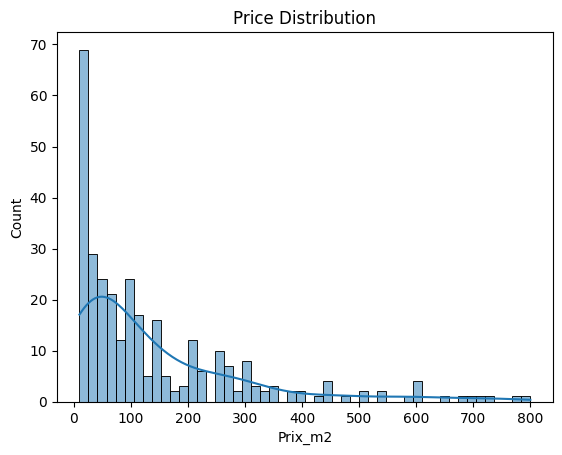

In [53]:
# Average price per Gouvernorat
avg_price_per_region = fdata.groupby('Gouvernorat')['Prix_m2'].mean()
print(avg_price_per_region)

# Price distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(fdata['Prix_m2'], bins=50, kde=True)
plt.title('Price Distribution')
plt.show()

---

### 📅 **4.2. Trend Analysis**  
- 📊 **Price Trends Over Time:** Analyze how land prices have changed over time.

<ipython-input-54-1d62b9354a6b>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  filtered_data['Prix_m2'].resample('M').mean().plot()


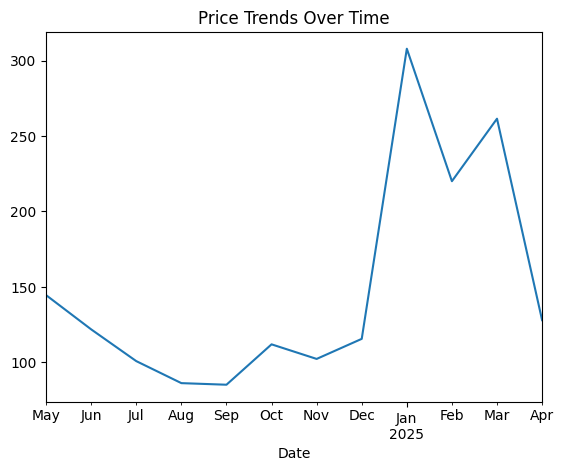

In [54]:
# Price trends over time
filtered_data.set_index('Date', inplace=True)
filtered_data['Prix_m2'].resample('M').mean().plot()
plt.title('Price Trends Over Time')
plt.show()

# 🧑‍💻 **5. Segmentation**

---

## 🧩 **5.1. Clustering**
- **K-Means Clustering:** Segment lands based on features like size, price, and proximity.  
- **Hierarchical Clustering:** Explore hierarchical relationships between lands.  

In [55]:
df1=filtered_data.copy()

# Fonction pour vérifier la proximité de la mer
def is_near_sea(proximite):
    if pd.isna(proximite):  # Gérer les valeurs manquantes
        return 0
    # Expression régulière pour capturer les motifs liés à la mer
    pattern = r'\b(proche de la mer|près de la mer|bord de mer|vue sur mer|à quelques mètres de la mer|front de mer|à l\'arrière de [\w\s\'-]+)\b'
    return 1 if re.search(pattern, str(proximite), re.IGNORECASE) else 0

# Fonction pour vérifier la proximité de la ville
def is_near_city(proximite):
    if pd.isna(proximite):  # Gérer les valeurs manquantes
        return 0
    # Expression régulière pour capturer les motifs liés à la ville
    pattern = r'\b(centre-ville|proche du centre|près du centre|zone urbaine|quartier résidentiel|zone touristique|proche des commerces)\b'
    return 1 if re.search(pattern, str(proximite), re.IGNORECASE) else 0

def has_infrastructure(infra):
    if pd.isna(infra):  # Gérer les valeurs manquantes
        return 0
    # Liste des infrastructures à vérifier
    pattern = r'\b(électricité|réseau électrique|eau|alimentation en eau|gaz|téléphone|système d\'irrigation|réservoir d\'eau|connexion internet|fibre optique|assainissement|tout-à-l’égout|voirie|sondage|forage|puit)\b'
    return 1 if re.search(pattern, str(infra), re.IGNORECASE) else 0

def is_delegation(delegation, target_delegation):
    if pd.isna(delegation):  # Gérer les valeurs manquantes
        return 0
    return 1 if str(delegation).strip().lower() == target_delegation.lower() else 0

def has_agriculture_type(agriculture):
    if pd.isna(agriculture):  # Gérer les valeurs manquantes
        return 0
    # Liste des types d'agriculture à vérifier
    pattern = r'\b(oliviers?|vignes?|arbres fruitiers?|céréales?|orangers?|palmiers?|blé|vigne|verger|grenadiers?|figuiers?|arbres?|cultures?|jardin|plantation)\b'
    return 1 if re.search(pattern, str(agriculture), re.IGNORECASE) else 0

def has_additional_feature(features):
    if pd.isna(features):  # Gérer les valeurs manquantes
        return 0
    # Liste des caractéristiques supplémentaires à vérifier
    pattern = r'\b(bâtiment|clôture|maison|piscine|puit|garage|serre|dépôt|hangar|grange|mur de clôture|entrepôt|entrepot|pergola|atelier|duplex|villa|titre foncier|papiers en règle)\b'
    return 1 if re.search(pattern, str(features), re.IGNORECASE) else 0

# Appliquer les fonctions pour créer les colonnes binaires
df1['Near_Sea'] = df1['Proximité'].apply(is_near_sea)
df1['Near_City'] = df1['Proximité'].apply(is_near_city)
df1['Has_Infrastructure'] = df1['Infrastructure'].apply(has_infrastructure)
df1['Has_Agriculture'] = df1['Type_Agriculture'].apply(has_agriculture_type)
df1['Has_Additional_Features'] = df1['Additional_Features'].apply(has_additional_feature)


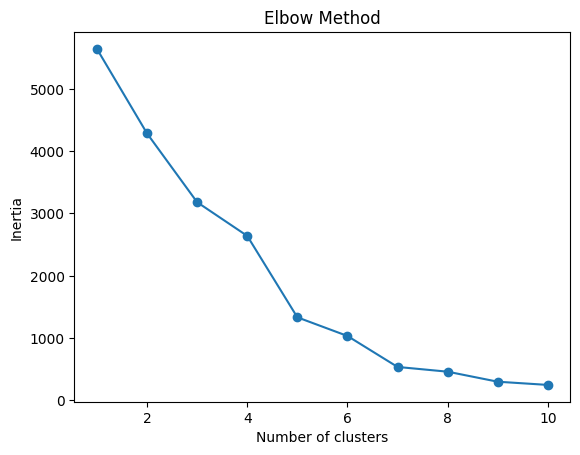

Silhouette Score: 0.631293074582104


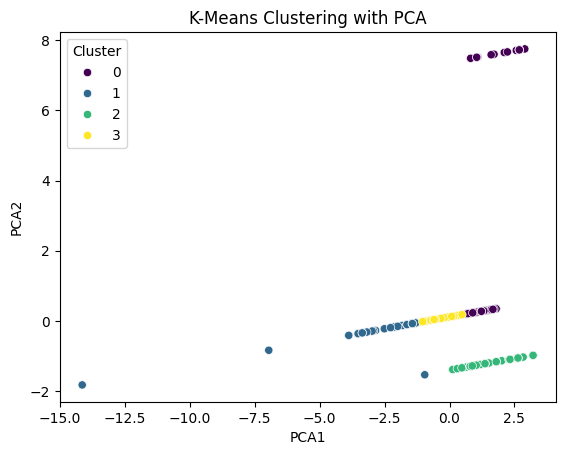

In [56]:
# Select features for clustering
features = df1[['Prix_m2', 'Taille_m2', 'Near_Sea', 'Near_City']].dropna()

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine optimal number of clusters using Elbow Method
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Apply K-Means clustering with optimal k
optimal_k = 4  # Replace with the optimal k from the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df1['Cluster'] = kmeans.fit_predict(scaled_features)

# Evaluate clustering using Silhouette Score
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
df1['PCA1'] = reduced_features[:, 0]
df1['PCA2'] = reduced_features[:, 1]

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df1, palette='viridis')
plt.title('K-Means Clustering with PCA')
plt.show()

## 🗺 **5.2. Geographical Mapping**

In [57]:
# Initialiser le géocodeur
geolocator = Nominatim(user_agent="tunisia_map")

# Créer une fonction pour géocoder une localité
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Ajouter les coordonnées au DataFrame
df1['Location'] = df1['Localité'].apply(geocode)
df1['Latitude'] = df1['Location'].apply(lambda loc: loc.latitude if loc else None)
df1['Longitude'] = df1['Location'].apply(lambda loc: loc.longitude if loc else None)

# Supprimer les lignes sans coordonnées
df1.dropna(subset=['Latitude', 'Longitude'], inplace=True)

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 534, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 516, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/http/client.py", line 1395, in getresponse
    response.begin()
  File "/usr/lib/python3.11/http/client.py", line 325, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/http/client.py", line 286, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/socket.py", line 718, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ssl.py", line

In [58]:
# Créer une carte centrée sur la Tunisie
tunisia_map = folium.Map(location=[34, 9], zoom_start=7)

# Ajouter des marqueurs pour chaque terrain
for idx, row in df1.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],  # Utiliser les colonnes Latitude et Longitude
        popup=f"Prix: {row['Prix']}, Taille: {row['Taille_m2']} m²",
        icon=folium.Icon(color='blue' if row['Cluster'] == 0 else 'green')
    ).add_to(tunisia_map)

# Enregistrer la carte
tunisia_map.save('lands_map.html')

# 📊 **6. Business Insights**

---

## 💰 **6.1. Investment Opportunities**
- Identify high-value lands based on location, price trends, and features.  
- Detect emerging areas for agricultural investment.  
- Compare price-per-m² across different regions.
---

## ⚠️ **6.2. Risk Assessment**
- Assess the stability of land prices over time.  
- Identify regions with fluctuating or declining land values.  
- Evaluate risks related to infrastructure, climate, and accessibility.  

In [59]:
# Trouver le cluster avec le prix moyen le plus élevé (haute valeur)
cluster_means = df1.groupby('Cluster')['Prix_m2'].mean()
high_value_cluster = cluster_means.idxmax()

# Trouver le cluster avec le prix moyen le plus bas (faible valeur)
low_value_cluster = cluster_means.idxmin()

# Filtrer les données pour ces clusters
high_value_lands = df1[df1['Cluster'] == high_value_cluster]
low_value_lands = df1[df1['Cluster'] == low_value_cluster]

print("High-value cluster:", high_value_cluster)
print(high_value_lands[['Gouvernorat', 'Délégation', 'Prix_m2', 'Taille_m2']])

print("\nLow-value cluster:", low_value_cluster)
print(low_value_lands[['Gouvernorat', 'Délégation', 'Prix_m2', 'Taille_m2']])

High-value cluster: 0
           Gouvernorat            Délégation     Prix_m2  Taille_m2
Date                                                               
2025-04-02      Nabeul               Kélibia  800.000000      913.0
2025-04-03      Nabeul               Kélibia  400.000000      300.0
2025-04-03      Nabeul               Kélibia  400.000000      300.0
2025-04-03   Ben arous  Boumhel El Bassatine  780.000000      324.0
2025-04-03      Nabeul      Hammam El Ghezaz  500.000000     2500.0
...                ...                   ...         ...        ...
2025-04-03    Medenine         Djerba Midoun  421.428571      700.0
2025-04-03      Sousse                Akouda  500.000000      234.0
2025-04-03      Nabeul          Hammamet Sud  482.758621      580.0
2025-04-03    Medenine                 Arkou  600.000000      613.0
2025-04-03    Medenine         Djerba Midoun  600.000000      613.0

[189 rows x 4 columns]

Low-value cluster: 1
           Gouvernorat       Délégation    Prix_

In [60]:
# Statistiques pour le cluster de haute valeur
print("High-value cluster statistics:")
print(high_value_lands[['Prix_m2', 'Taille_m2']].describe())

# Statistiques pour le cluster de faible valeur
print("\nLow-value cluster statistics:")
print(low_value_lands[['Prix_m2', 'Taille_m2']].describe())

High-value cluster statistics:
          Prix_m2     Taille_m2
count  189.000000    189.000000
mean   581.139735   1930.830688
std    169.302636   1698.132658
min     10.602099    100.000000
25%    500.000000    840.000000
50%    600.000000   1201.000000
75%    730.000000   2500.000000
max    800.000000  10000.000000

Low-value cluster statistics:
          Prix_m2      Taille_m2
count  113.000000     113.000000
mean    21.178099   83715.893805
std     14.428319   82118.314949
min     10.000000   48000.000000
25%     13.000000   50000.000000
50%     16.428571   60000.000000
75%     25.000000   80000.000000
max     99.000000  800000.000000


---

# 📈 **7. Visualization**

In [61]:
# Interactive scatter plot with a title
fig = px.scatter(df1, x='Prix_m2', y='Taille_m2', color='Cluster',
                 hover_data=['Gouvernorat', 'Délégation'],
                 title='Interactive Scatter Plot of Prix_m2 vs Taille_m2 by Cluster')

fig.show()

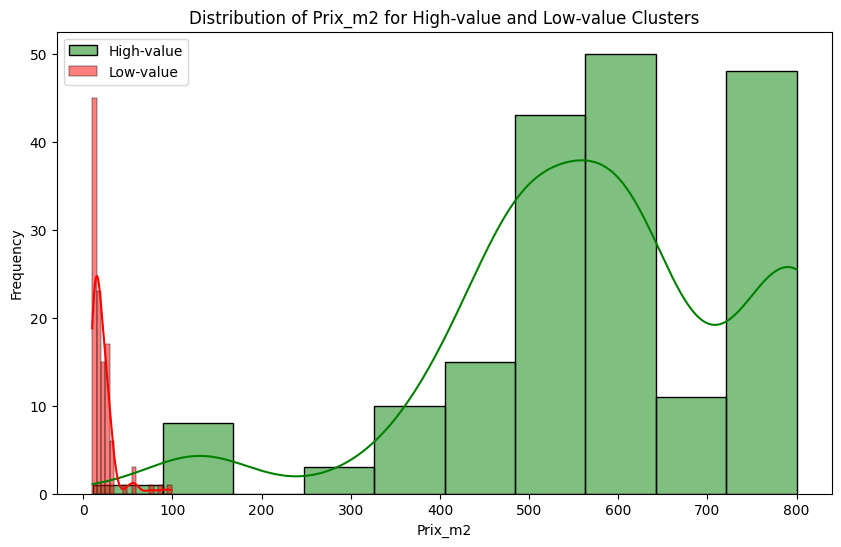

In [62]:
# Distribution des Prix_m2 pour les clusters de haute et faible valeur
plt.figure(figsize=(10, 6))
sns.histplot(high_value_lands['Prix_m2'], color='green', label='High-value', kde=True)
sns.histplot(low_value_lands['Prix_m2'], color='red', label='Low-value', kde=True)
plt.xlabel('Prix_m2')
plt.ylabel('Frequency')
plt.title('Distribution of Prix_m2 for High-value and Low-value Clusters')
plt.legend()
plt.show()

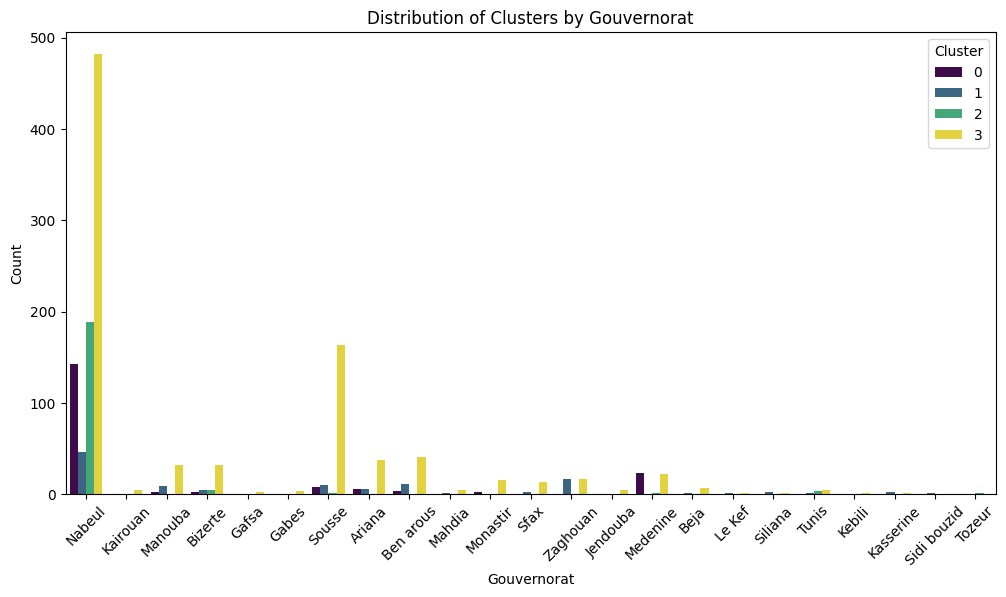

In [63]:
# Répartition des clusters par Gouvernorat
plt.figure(figsize=(12, 6))
sns.countplot(x='Gouvernorat', hue='Cluster', data=df1, palette='viridis')
plt.xlabel('Gouvernorat')
plt.ylabel('Count')
plt.title('Distribution of Clusters by Gouvernorat')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()

<ipython-input-64-aac639ae416a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




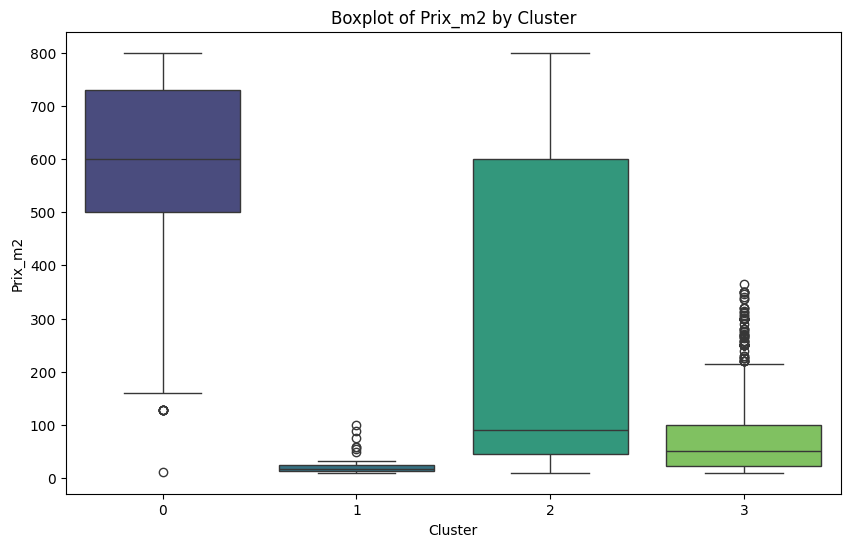

In [64]:
# Boxplot des Prix_m2 par Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Prix_m2', data=df1, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Prix_m2')
plt.title('Boxplot of Prix_m2 by Cluster')
plt.show()

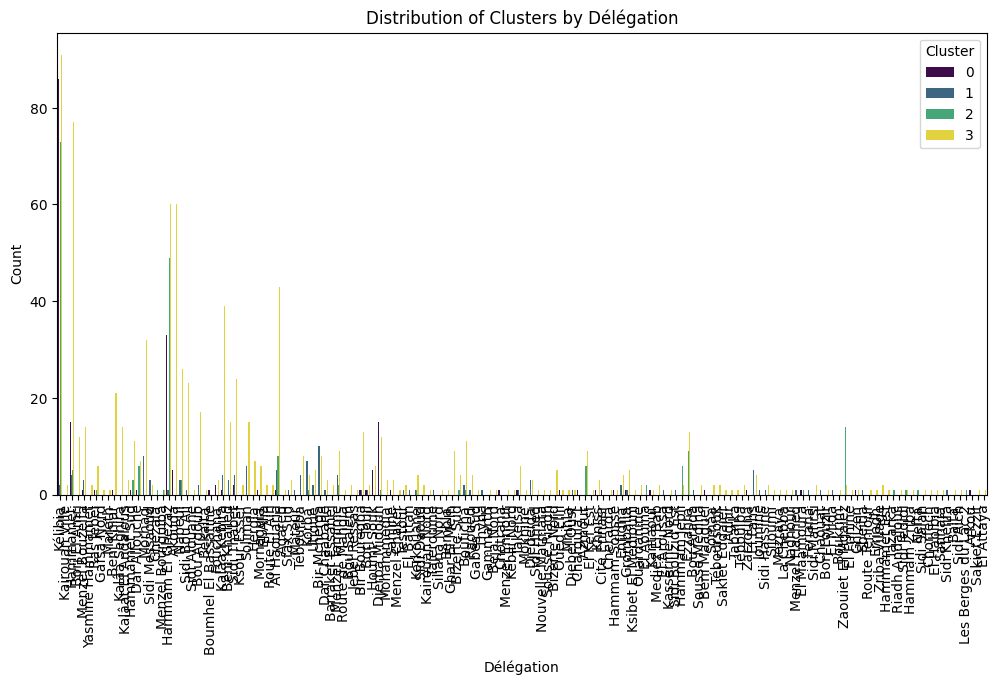

In [65]:
# Répartition des délégations pour les clusters de haute et faible valeur
plt.figure(figsize=(12, 6))
sns.countplot(x='Délégation', hue='Cluster', data=df1, palette='viridis')
plt.xlabel('Délégation')
plt.ylabel('Count')
plt.title('Distribution of Clusters by Délégation')
plt.xticks(rotation=90)
plt.legend(title='Cluster')
plt.show()